<a href="https://colab.research.google.com/github/Eman-Adly/Eman/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [123]:
train = pd.read_csv(r'/train.csv')
test = pd.read_csv(r'/test.csv')



In [124]:
7#train.head()
#train.tail()
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0,NaN,S


In [125]:
train.shape

(891, 12)

In [126]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [128]:
nu=train.isnull().sum()
nu[nu>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

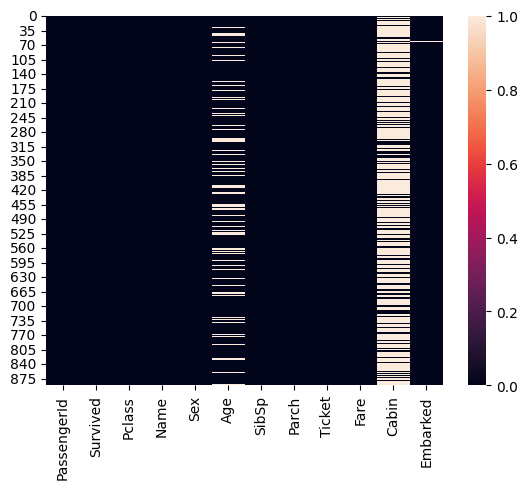

In [129]:
sns.heatmap(train.isnull())

In [130]:
#def clean(d)
  # d.drop(['Cabin','Fare','Embarked','Name','Ticket'],axis=1,inplace=True)  #delet columns
  # d.Age=d.Age.fillna(d.Age.median())
   #d.dropna()
   #return d
  # clean(train)

In [131]:
train.drop(['Cabin','Fare','Embarked','Name','Ticket'],axis=1,inplace=True)  #delet columns
train.Age=train.Age.fillna(train.Age.median())
train.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


<Axes: >

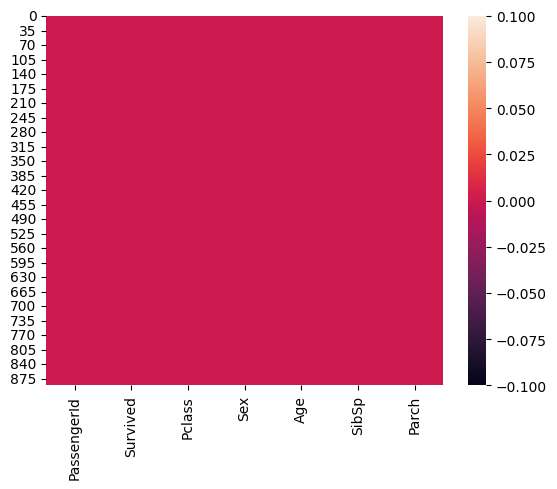

In [132]:
sns.heatmap(train.isnull())

<Axes: >

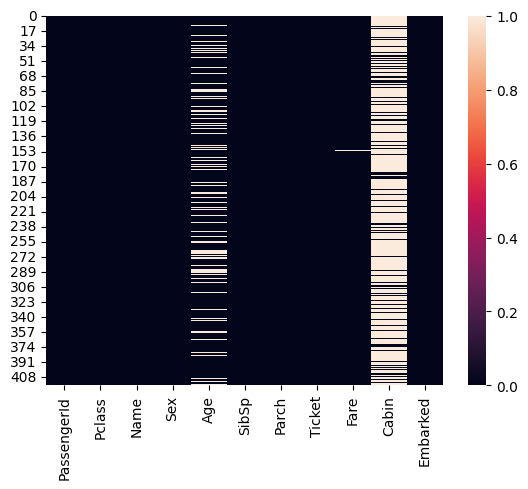

In [133]:
sns.heatmap(test.isnull())

In [134]:
test.drop(['Cabin','Fare','Embarked','Name','Ticket'],axis=1,inplace=True)  #delet columns
test.Age=test.Age.fillna(test.Age.median())
test.dropna()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,27.0,0,0


In [135]:
co=train.corr()

<ipython-input-135-85f1e55d5584>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co=train.corr()


<Axes: >

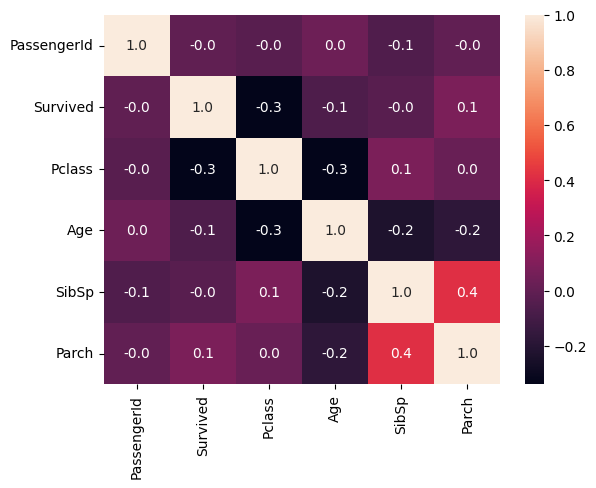

In [136]:
sns.heatmap(co,annot=True,fmt='.1f')

In [137]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: ylabel='Sex'>

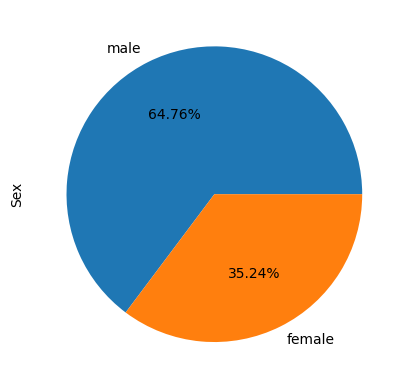

In [138]:
train.Sex.value_counts().plot.pie(autopct='%0.2f%%')

<Axes: xlabel='count', ylabel='Sex'>

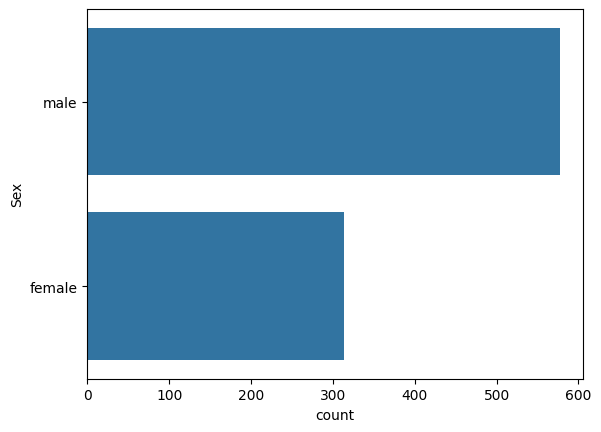

In [139]:
sns.countplot(train.Sex)

<Axes: ylabel='count'>

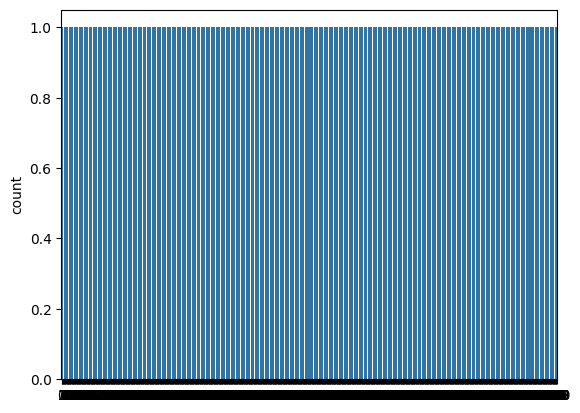

In [140]:
sns.countplot(train.Pclass)

<Axes: xlabel='Age', ylabel='Count'>

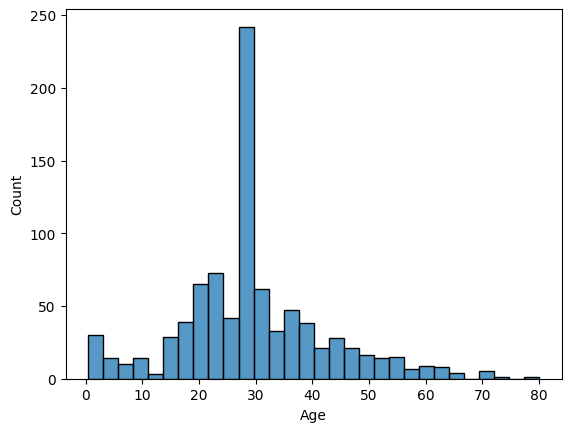

In [141]:
sns.histplot(train.Age)

In [142]:
#train.Sex=pd.get_dummies(train.Sex)
#test.Sex=pd.get_dummies(test.Sex)
# Assuming 'Sex' is a column in both train and test DataFrames
#train = pd.concat([train, pd.get_dummies(train['Sex'], prefix='Sex')], axis=1)
#test = pd.concat([test, pd.get_dummies(test['Sex'], prefix='Sex')], axis=1)
sex_mapping = {'male': 0, 'female': 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)


In [143]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


In [144]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22.0,1,0
1,2,1,1,1,38.0,1,0
2,3,1,3,1,26.0,0,0
3,4,1,1,1,35.0,1,0
4,5,0,3,0,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0
887,888,1,1,1,19.0,0,0
888,889,0,3,1,28.0,1,2
889,890,1,1,0,26.0,0,0


In [145]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,0,34.5,0,0
1,893,3,1,47.0,1,0
2,894,2,0,62.0,0,0
3,895,3,0,27.0,0,0
4,896,3,1,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0
414,1306,1,1,39.0,0,0
415,1307,3,0,38.5,0,0
416,1308,3,0,27.0,0,0


In [146]:
x=train.drop(['Survived'],axis=1)
y=train.Survived

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8)

In [148]:
accuracies=[]

In [149]:
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [150]:
a=model1.predict(x_test)

In [151]:
accuracy_score(a,y_test)

0.7094972067039106

In [152]:
model2=LogisticRegression()
model2.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [153]:
b=model2.predict(x_test)

In [154]:
accuracy_score(b,y_test)

0.8044692737430168

In [155]:
#accuracies=[]

In [156]:
#def all(model):
  #model1.fit(x_train,y_train)
  #pre=model1.predict(x_test)
  #accuracy=accuracy_score(pre,y_test)
  #print('Accuracy is : ',accuracy)
  #accuracies.append(accuracy)


In [157]:
#model1=LogisticRegression()
#all(model1)

#model2=RandomForestClassifier()
#all(model2)

#model3=GradientBoostingClassifier()
#all(model3)

In [158]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [159]:
c=model3.predict(x_test)

In [160]:
accuracy_score(c,y_test)

0.8156424581005587

In [161]:
model4=GradientBoostingClassifier()
model4.fit(x_train,y_train)

GradientBoostingClassifier()

In [162]:
d=model4.predict(x_test)

In [163]:
accuracy_score(d,y_test)

0.7877094972067039

In [164]:
model5=KNeighborsClassifier()
model5.fit(x_train,y_train)

KNeighborsClassifier()

In [165]:
e=model5.predict(x_test)

In [166]:
accuracy_score(e,y_test)

0.5754189944134078

In [167]:
model6=GaussianNB()
model6.fit(x_train,y_train)

GaussianNB()

In [168]:
f=model6.predict(x_test)

In [169]:
accuracy_score(f,y_test)

0.776536312849162

In [170]:
model7=SVC()
model7.fit(x_train,y_train)

SVC()

In [171]:
g=model7.predict(x_test)

In [172]:
accuracy_score(g,y_test)

0.5865921787709497

In [173]:
accuracies=[0.8268156424581006 , 0.8156424581005587 , 0.8491620111731844 , 0.7374301675977654 , 0.5586592178770949 , 0.8324022346368715 , 0.6368715083798883]

In [174]:
algorithms=['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','SVC']

In [175]:
new=pd.DataFrame({'algorithms':algorithms,'accuracies':accuracies})

In [176]:
new

,algorithms,accuracies
0,LogisticRegression,0.826816
1,RandomForestClassifier,0.815642
2,GradientBoostingClassifier,0.849162
3,DecisionTreeClassifier,0.737430
4,KNeighborsClassifier,0.558659
5,GaussianNB,0.832402
6,SVC,0.636872


In [177]:
modelx=GradientBoostingClassifier()
modelx.fit(x_train,y_train)

GradientBoostingClassifier()

In [178]:
lp=modelx.predict(test)

In [179]:
final=test.PassengerId

In [181]:
new_dataframe=pd.DataFrame({'PassengerId':final,'survived':lp})

In [186]:
new_dataframe.to_csv('eman.csv',index=False)